**Data Set Information:**

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_original = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df = df_original.copy()

In [4]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


### explanation

**Area**: Üzümün kapladığı toplam alan (piksel cinsinden).                
**MajorAxisLength**: Üzümün en uzun ekseni (boyu).            
**MinorAxisLength**: Üzümün en kısa ekseni (eni).              
**Eccentricity**: Üzümün oval veya yuvarlak olma derecesi. 0'a yakınsa yuvarlak, 1'e yakınsa daha ovaldir.            
**ConvexArea**: Üzümün dış hatlarının oluşturduğu en küçük konveks alan.           
**Extent**: Üzümün alanının, çevresini saran dikdörtgenin alanına oranı.             
**Perimeter**: Üzümün çevresi (sınır çizgisi uzunluğu).                 
**Class**: Üzümün çeşidi (etiket).            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [8]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

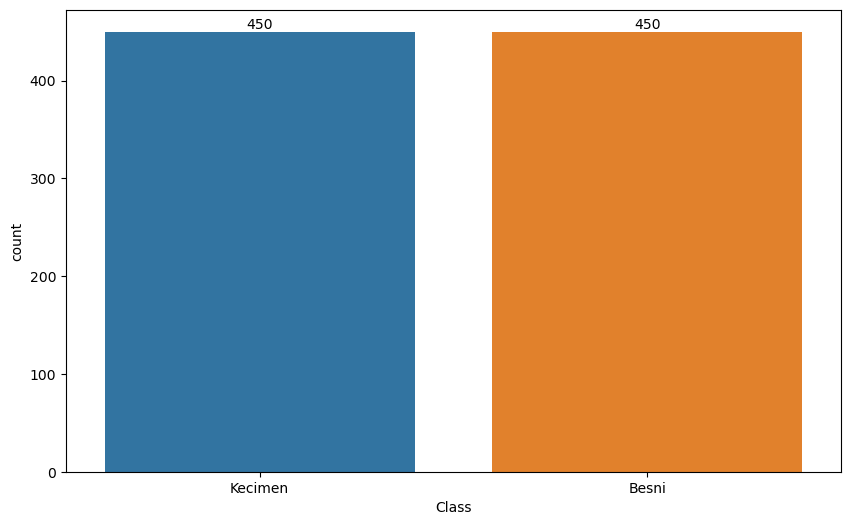

In [9]:
ax = sns.countplot(data = df, x = "Class" )
ax.bar_label(ax.containers[0])
plt.show()

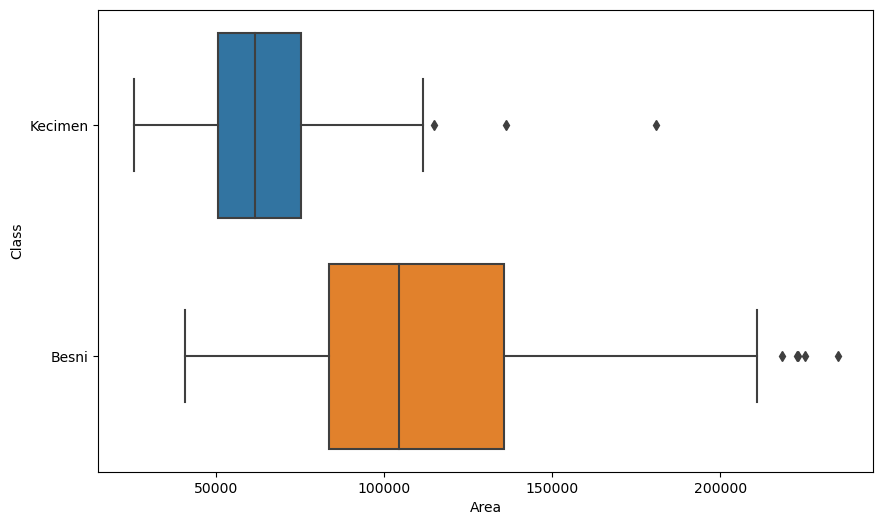

In [10]:
sns.boxplot(data = df, x = "Area", y = "Class");

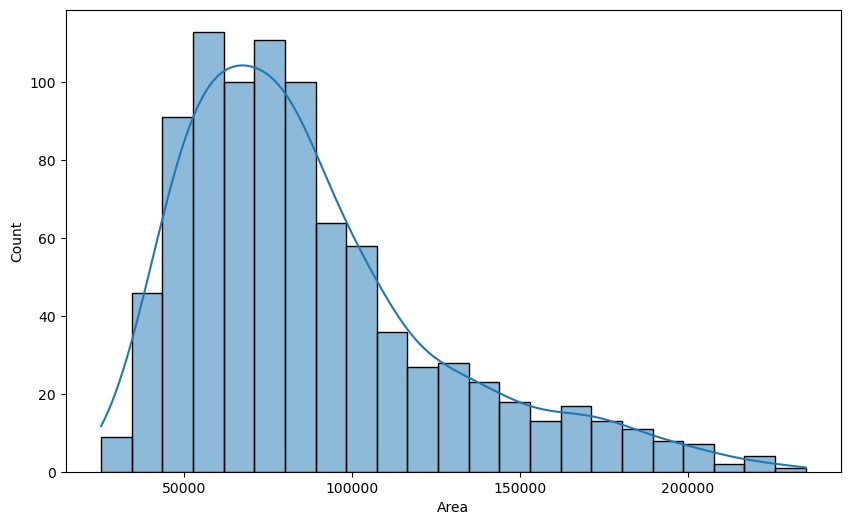

In [11]:
sns.histplot(df['Area'], kde=True);

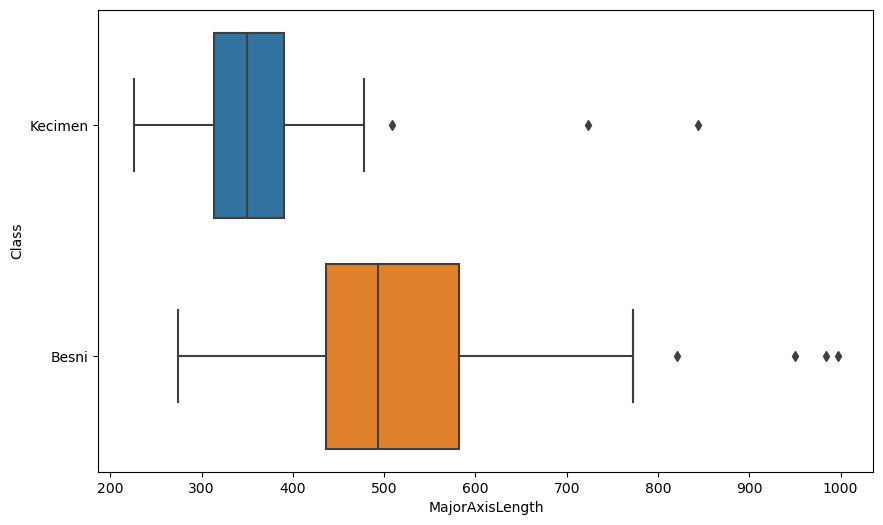

In [12]:
sns.boxplot(data = df, x = "MajorAxisLength", y = "Class");

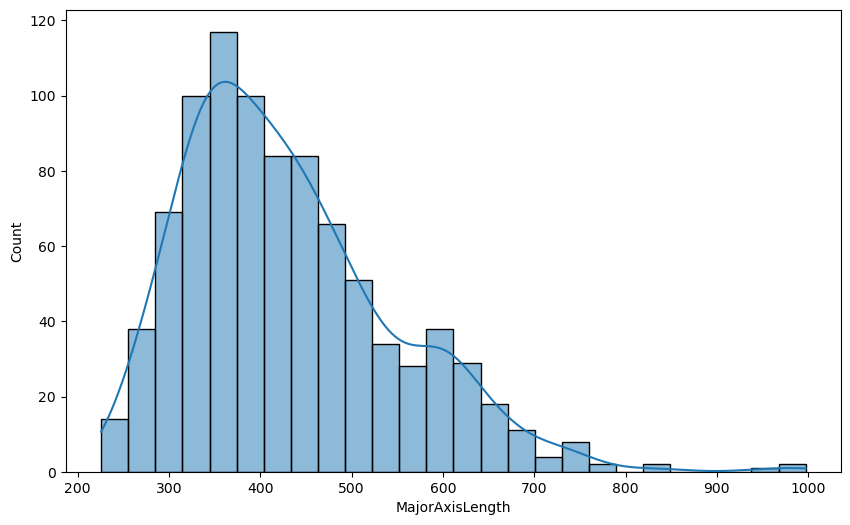

In [13]:
sns.histplot(df['MajorAxisLength'], kde=True);

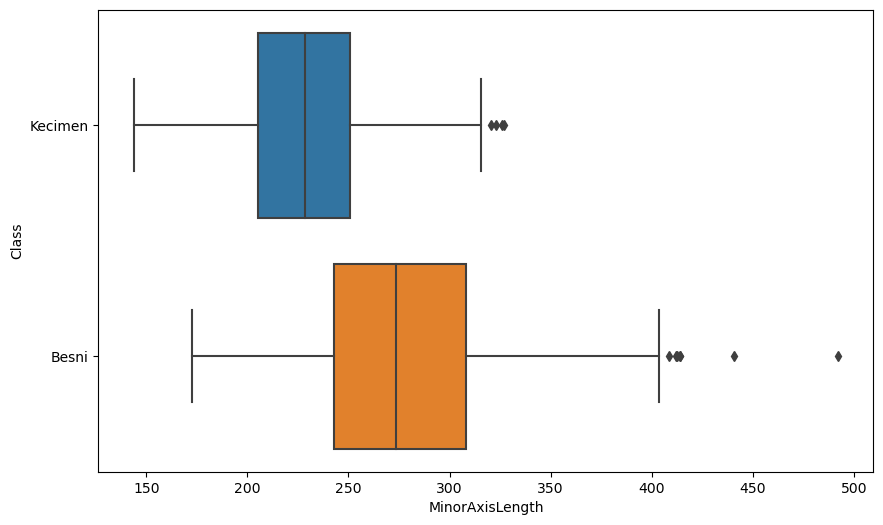

In [14]:
sns.boxplot(data = df, x = "MinorAxisLength", y = "Class");

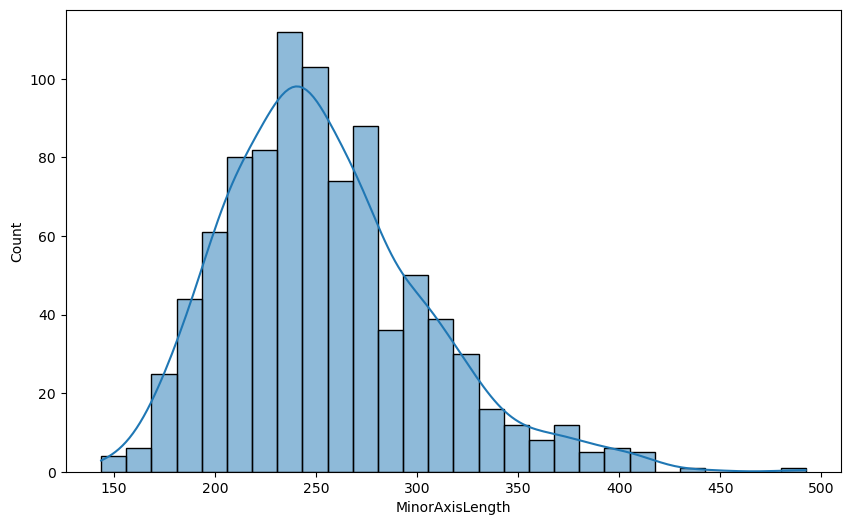

In [15]:
sns.histplot(df['MinorAxisLength'], kde=True);

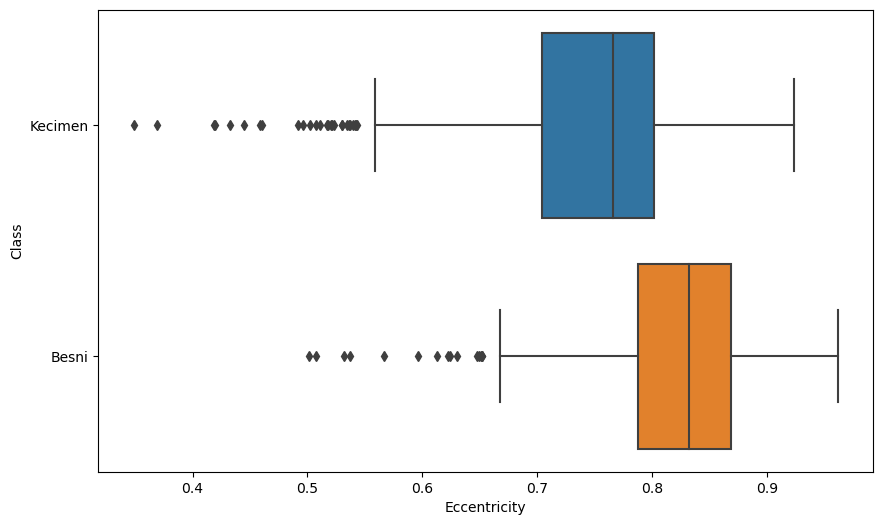

In [16]:
sns.boxplot(data = df, x = "Eccentricity", y = "Class");

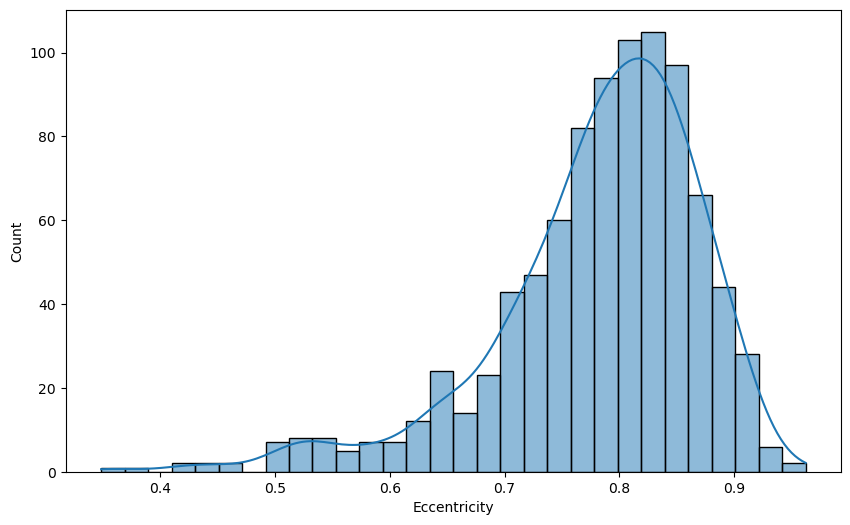

In [17]:
sns.histplot(df['Eccentricity'], kde=True);

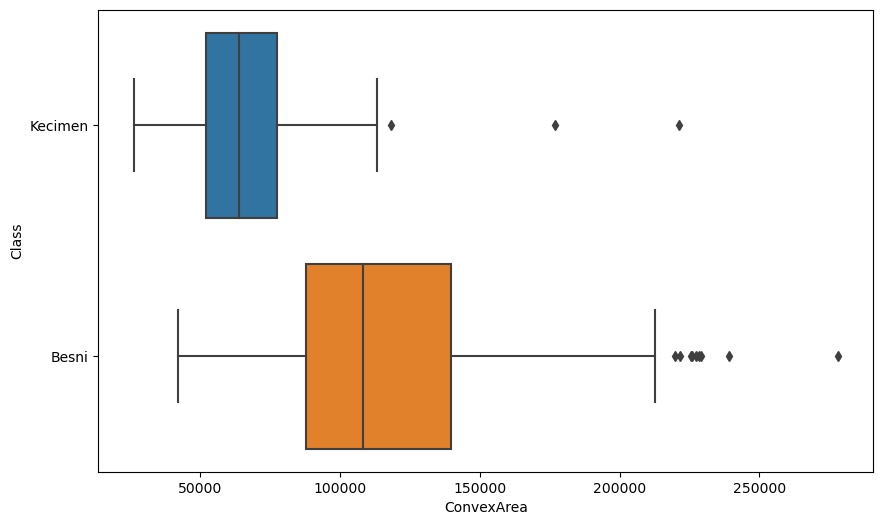

In [18]:
sns.boxplot(data = df, x = "ConvexArea", y = "Class");

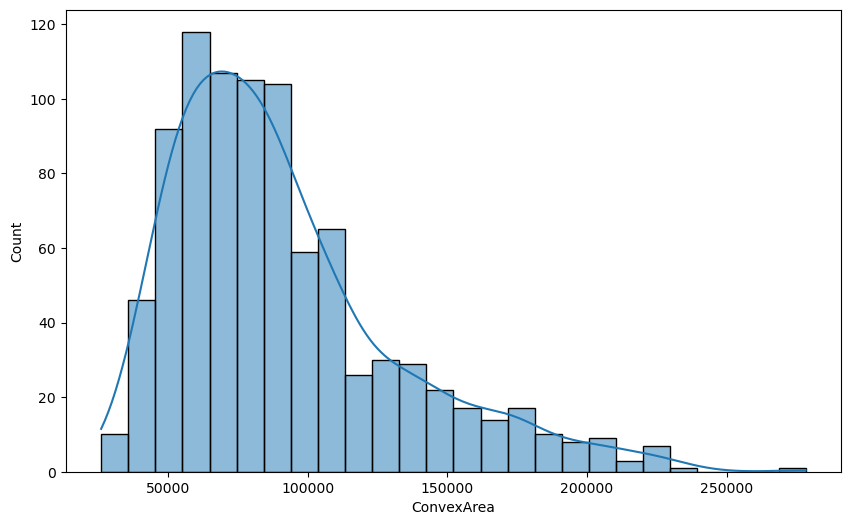

In [19]:
sns.histplot(df['ConvexArea'], kde=True);

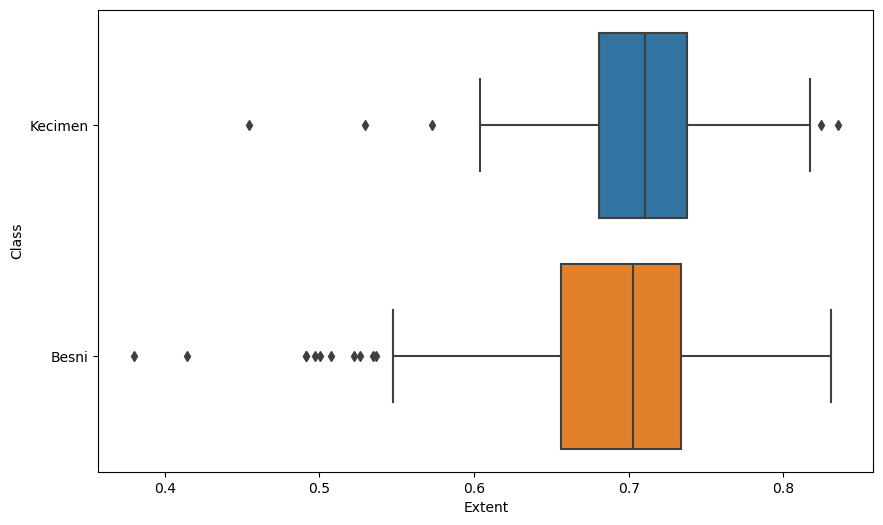

In [20]:
sns.boxplot(data = df, x = "Extent", y = "Class");

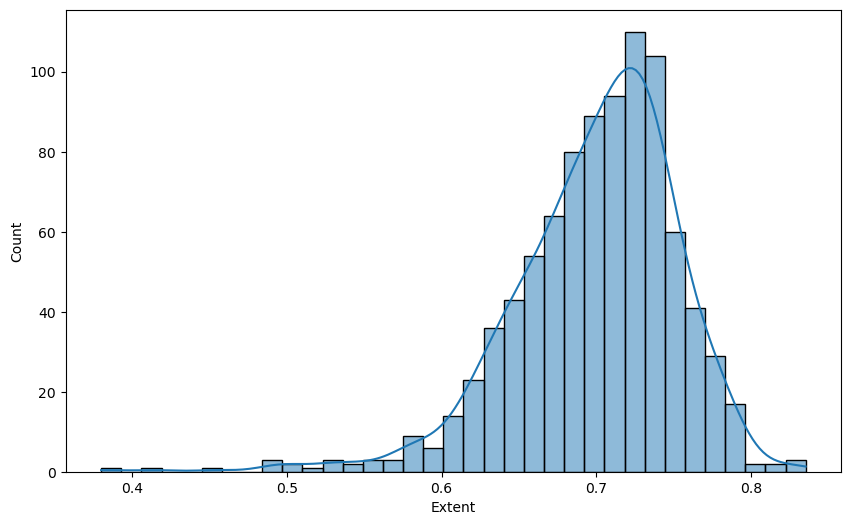

In [21]:
sns.histplot(df['Extent'], kde=True);

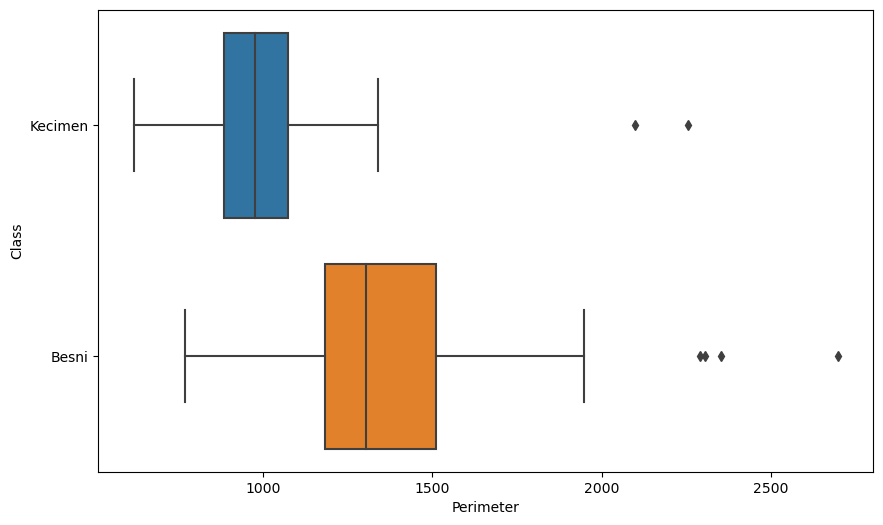

In [22]:
sns.boxplot(data = df, x = "Perimeter", y = "Class");

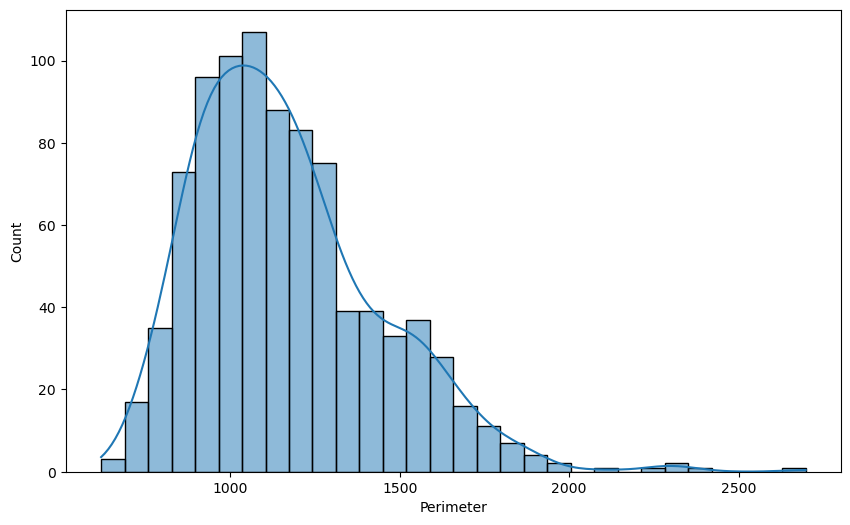

In [23]:
sns.histplot(df['Perimeter'], kde=True);

In [24]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [25]:
df['Class'] = df['Class'].replace({'Besni': 1, 'Kecimen': 0})

In [26]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,1
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,1
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,1
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,1


In [27]:
df["Class"].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

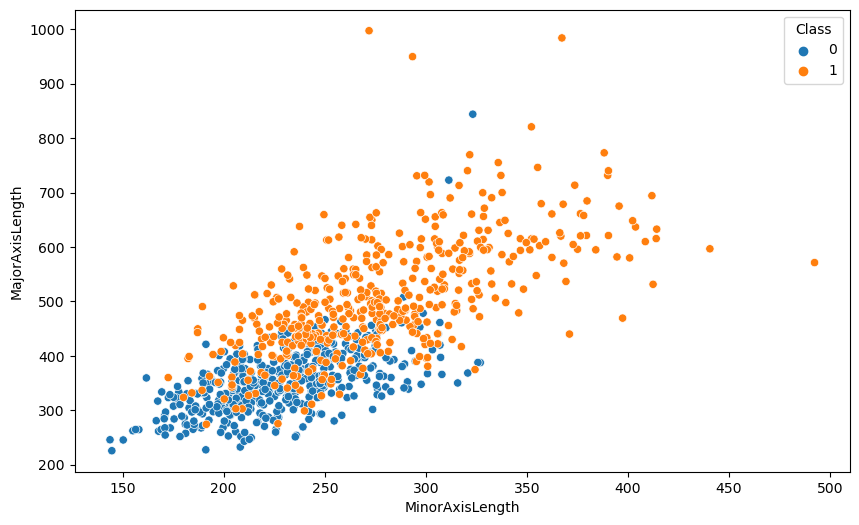

In [28]:
sns.scatterplot(data = df, x = "MinorAxisLength", y = "MajorAxisLength", hue = "Class" );

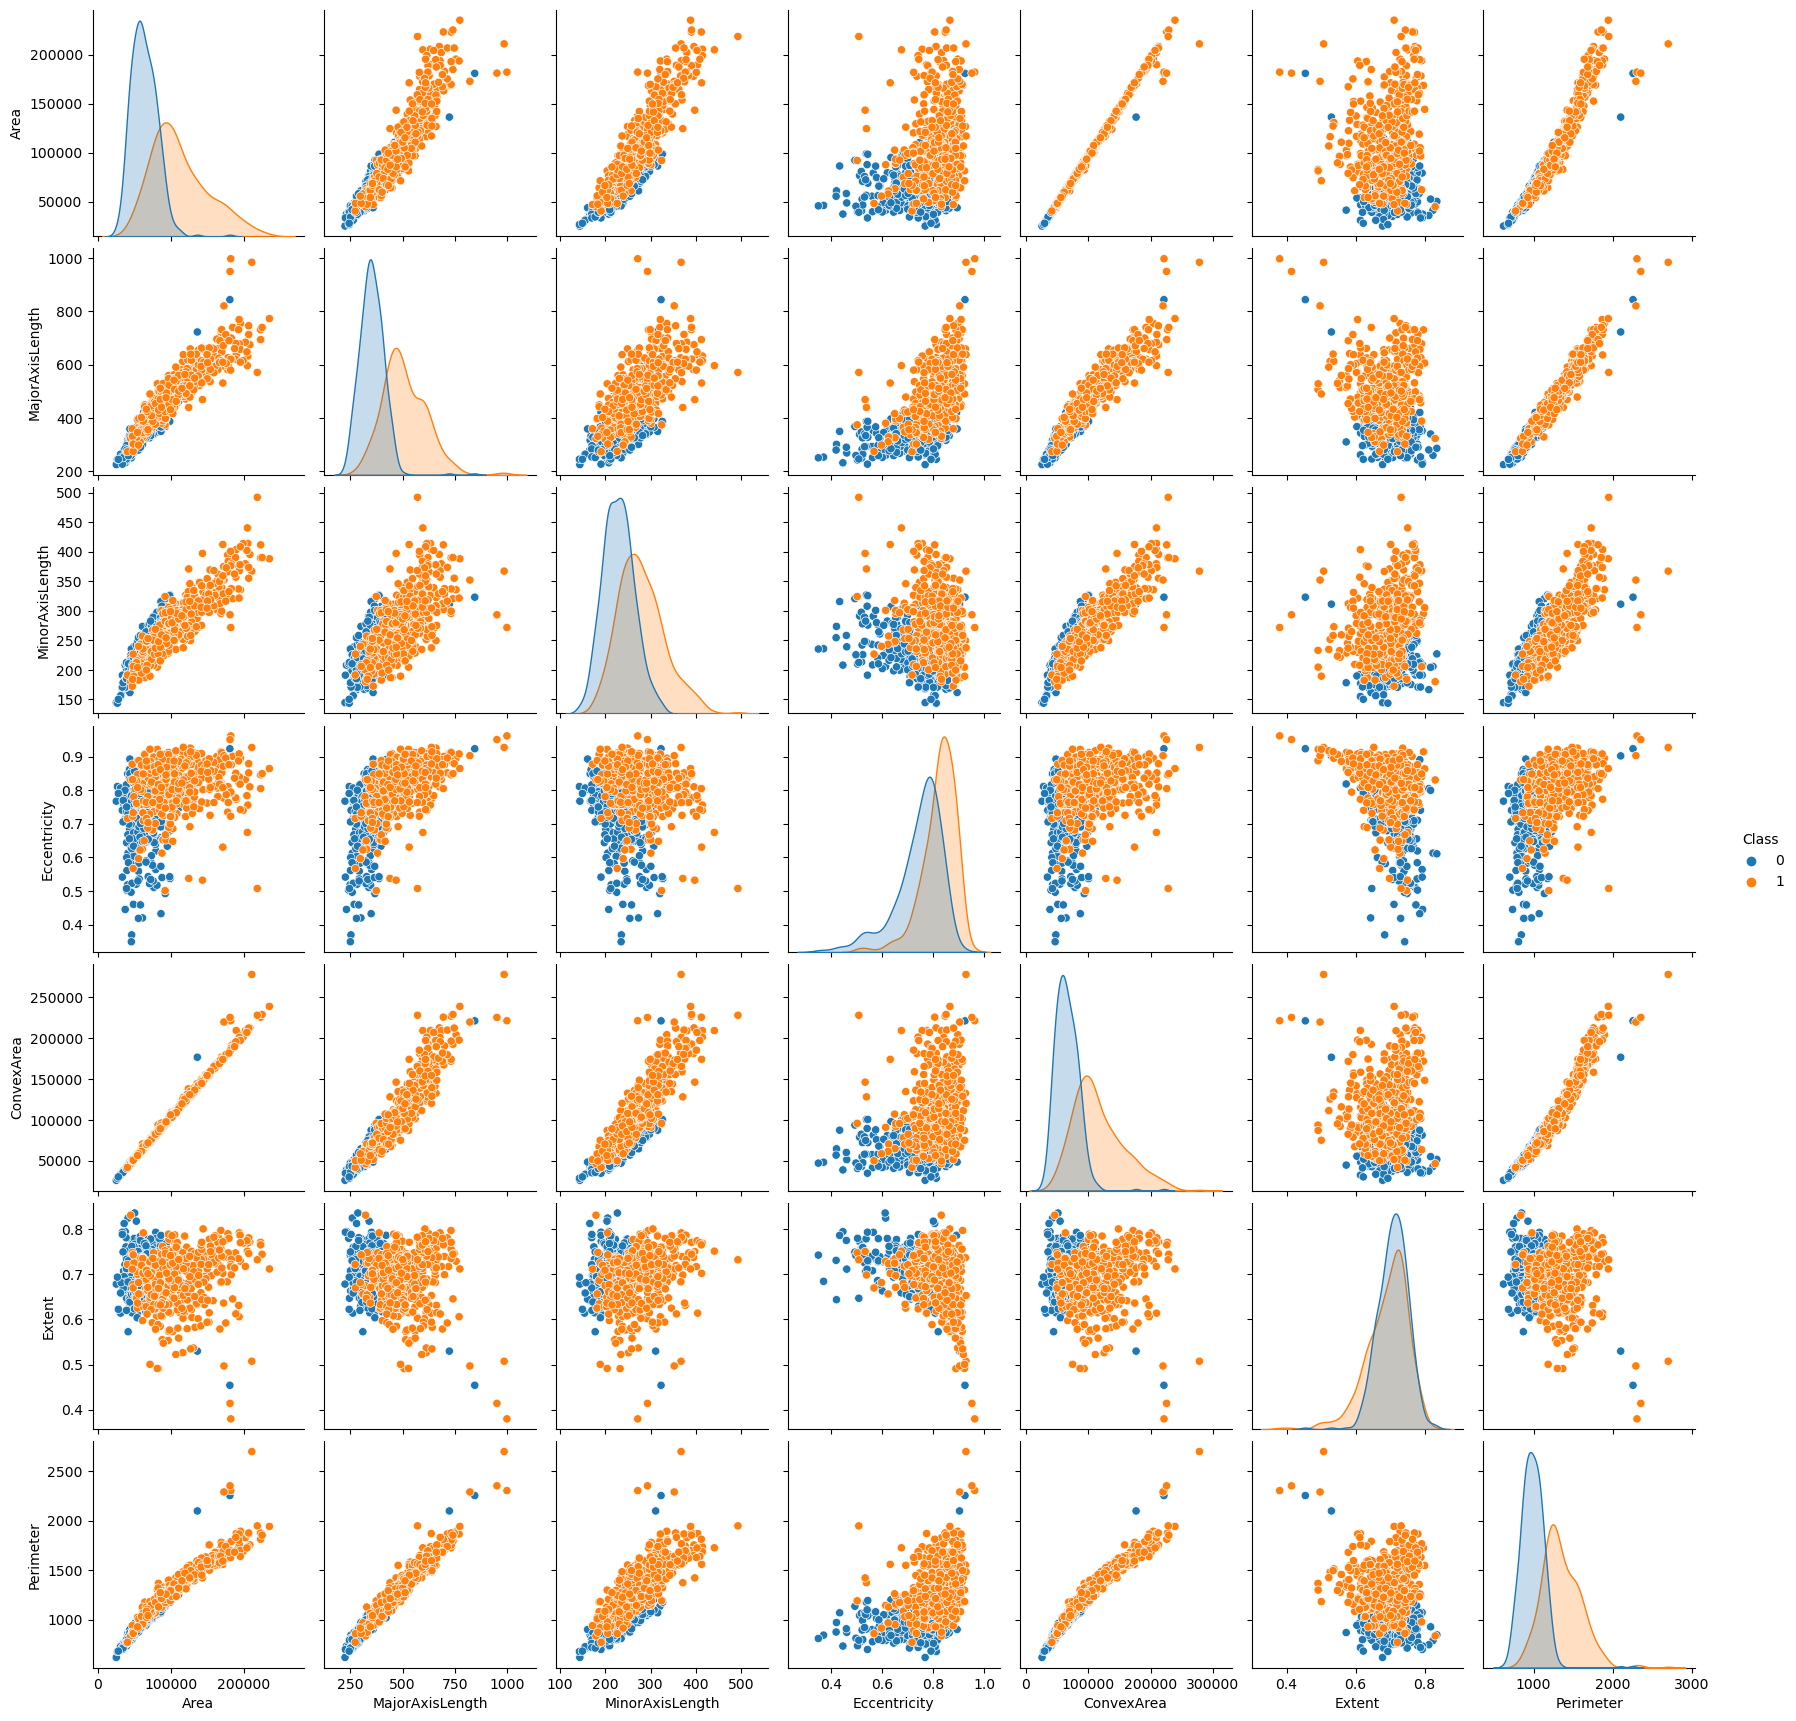

In [29]:
sns.pairplot(df, hue= "Class")
plt.show()

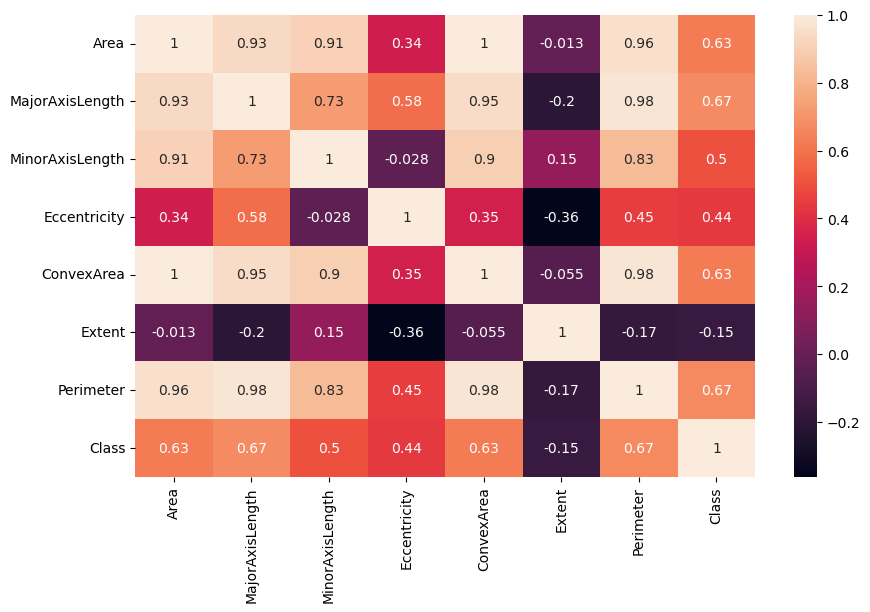

In [30]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [31]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0


In [32]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y,  random_state = 10)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
log_model = StandardScaler()

In [37]:
X_train_scaled = log_model.fit_transform(X_train)
X_test_scaled = log_model.transform(X_test)

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]


In [41]:
pipe_model = Pipeline(steps = operations)

In [42]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [43]:
pipe_model["logistic"].coef_

array([[ 0.1061352 ,  1.03789291, -1.46242173, -0.24130596,  1.09846161,
        -0.2265741 ,  2.68072308]])

In [44]:
y_pred_1 = pipe_model.predict(X_test)
y_pred_train_1 = pipe_model.predict(X_train)

## <font color='blue'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [45]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.6f}'.format})
pd.set_option('display.float_format', '{:.6f}'.format) # bilimsel gösterimi devre dışı bırakmak.

In [46]:
y_pred_1_proba = pipe_model.predict_proba(X_test)


In [47]:
y_pred_1_proba_rounded = np.round(y_pred_1_proba,2)


In [48]:
test_data = pd.concat([X_test, y_test ], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793000,0
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680000,1
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016000,0
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182000,0
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491000,1
...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093000,0
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330000,0
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221000,0
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712000,1


In [49]:
test_data["y_pred"] = y_pred_1


In [50]:
test_data["pred_proba"] = y_pred_1_proba_rounded[:,1] 

In [51]:
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,y_pred,pred_proba
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793000,0,0,0.090000
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680000,1,1,0.790000
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016000,0,0,0.140000
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182000,0,0,0.020000
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491000,1,0,0.280000
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093000,0,0,0.240000
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330000,0,1,0.780000
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221000,0,0,0.170000
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712000,1,1,1.000000


## <font color='blue'> <b>Model Performance</b><font color='black'>

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [53]:
accuracy_score(y_test, y_pred_1)

0.8722222222222222

In [54]:
pipe_model.score(X_test, y_test)

0.8722222222222222

In [55]:
precision_score(y_test, y_pred_1, pos_label = 1)

0.8941176470588236

In [56]:
precision_score(y_test, y_pred_1, pos_label = 0)

0.8526315789473684

In [57]:
recall_score(y_test, y_pred_1, pos_label = 1)

0.8444444444444444

In [58]:
recall_score(y_test, y_pred_1, pos_label = 0)

0.9

In [59]:
f1_score(y_test, y_pred_1, pos_label = 1)

0.8685714285714287

In [60]:
f1_score(y_test, y_pred_1, pos_label=0) 

0.8756756756756757

In [61]:
log_loss(y_test, y_pred_1)

4.605577933053858

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay   

In [63]:
confusion_matrix(y_test, y_pred_1)

array([[81,  9],
       [14, 76]], dtype=int64)

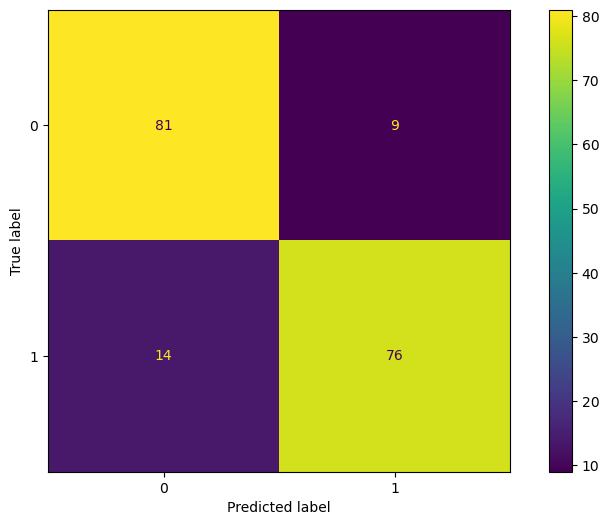

In [64]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

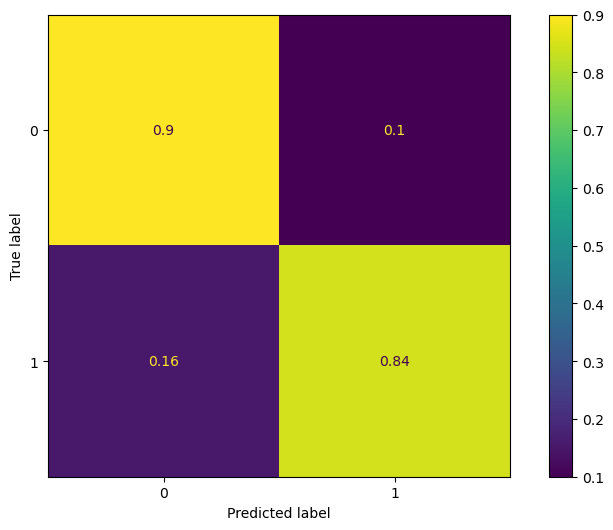

In [65]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize = 'true')
plt.show()

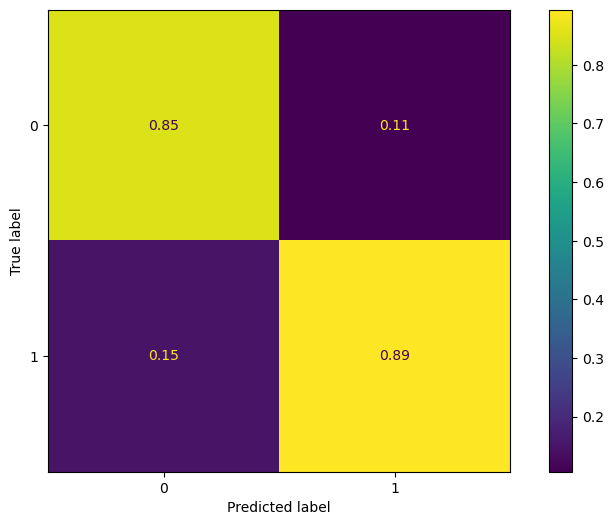

In [66]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='pred')
plt.show()


In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [68]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)


Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [69]:
from sklearn.model_selection import cross_validate
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.010998,0.008993,0.875000,0.868827,0.935484,0.881789,0.805556,0.851852,0.865672,0.866562
2,0.008004,0.007997,0.847222,0.867284,0.857143,0.878981,0.833333,0.851852,0.845070,0.865204
3,0.007001,0.008137,0.861111,0.870370,0.842105,0.887097,0.888889,0.848765,0.864865,0.867508
4,0.008465,0.007009,0.819444,0.868827,0.767442,0.879365,0.916667,0.854938,0.835443,0.866980
5,0.007040,0.008994,0.861111,0.868827,0.933333,0.876972,0.777778,0.858025,0.848485,0.867395
6,0.008000,0.006998,0.847222,0.865741,0.903226,0.869159,0.777778,0.861111,0.835821,0.865116
7,0.008984,0.009001,0.930556,0.862654,0.942857,0.875399,0.916667,0.845679,0.929577,0.860283
8,0.007999,0.008002,0.847222,0.870370,0.804878,0.882166,0.916667,0.854938,0.857143,0.868339
9,0.006999,0.009006,0.847222,0.864198,0.857143,0.871069,0.833333,0.854938,0.845070,0.862928
10,0.007000,0.007999,0.902778,0.864198,0.967742,0.875796,0.833333,0.848765,0.895522,0.862069


In [70]:
df_scores.mean()[2:]

test_accuracy     0.863889
train_accuracy    0.867130
test_precision    0.881135
train_precision   0.877779
test_recall       0.850000
train_recall      0.853086
test_f1           0.862267
train_f1          0.865238
dtype: float64

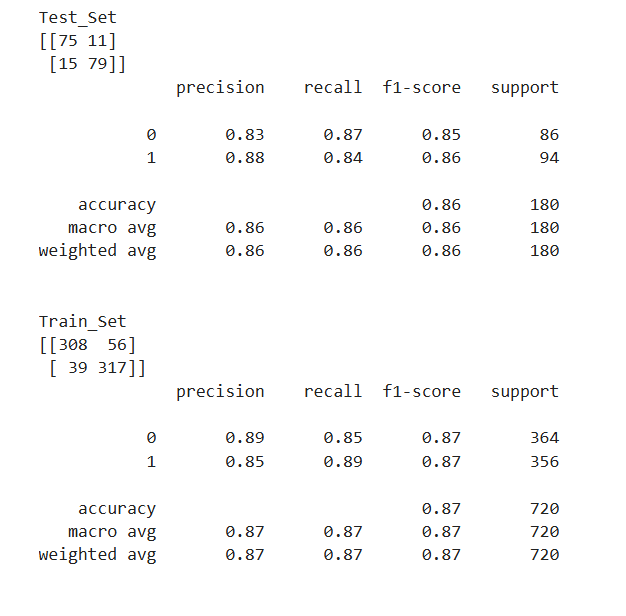

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [71]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=10000))]
model = Pipeline(steps=operations)

In [72]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  # ElasticNet için l1_ratio ekliyoruz
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [73]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv = 5,  return_train_score = True)

In [74]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000))]),
             param_grid=[{'logistic__C': array([0.100000, 0.206914, 0.428133, 0.885867, 1.832981, 3.792690,
       7.847600, 16.237767, 33.598183, 69.519280, 143.844989, 297.635144,
       615.848211, 1274.274986, 2636.650899, 5455.594781, 11288.378917,
       23357.214691, 48329....
       615.848211, 1274.274986, 2636.650899, 5455.594781, 11288.378917,
       23357.214691, 48329.302386, 100000.000000]),
                          'logistic__l1_ratio': array([0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556,
       0.666667, 0.777778, 0.888889, 1.000000]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [75]:
grid_model.best_params_

{'logistic__C': 2636.6508987303555,
 'logistic__penalty': 'l2',
 'logistic__solver': 'newton-cg'}

In [76]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=2636.6508987303555, max_iter=10000,
                                    solver='newton-cg'))])

In [77]:
grid_search_y_pred = grid_model.predict(X_test)
grid_search_train_y_pred = grid_model.predict(X_train)

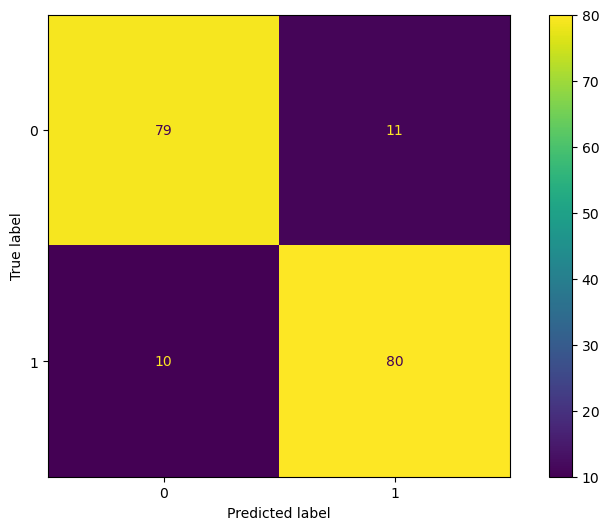

In [78]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()

In [79]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[326  34]
 [ 54 306]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       360
           1       0.90      0.85      0.87       360

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.88       720
weighted avg       0.88      0.88      0.88       720



In [80]:
eval_metric(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

In [81]:
from sklearn.metrics import  RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve, average_precision_score

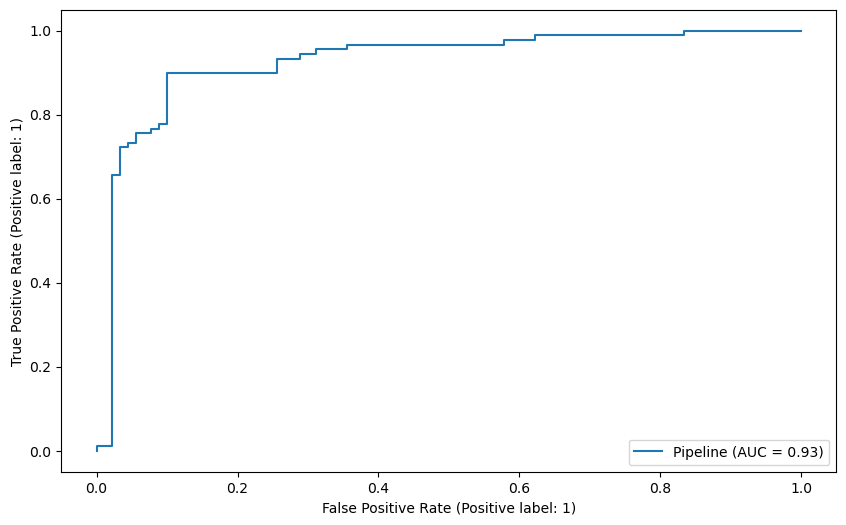

In [82]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

In [83]:
roc_auc_score(y_test, y_pred_1_proba_rounded[:,1])

0.9298148148148149

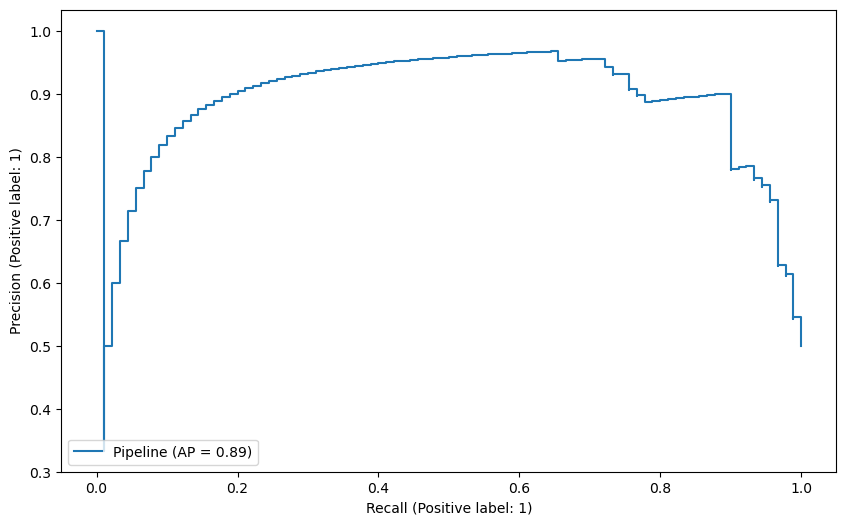

In [84]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

In [85]:
average_precision_score(y_test, y_pred_1_proba_rounded[:, 1])

0.9165068817723151

# <font color='green'> <b>Prediction</b><font color='black'>

In [86]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps = operations)

final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [87]:
import pickle

In [88]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [89]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [90]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040000,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786000,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575000,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162000,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251000,0


In [91]:
sample = pd.DataFrame({
    "Area": [64000, 73000, 81000, 69500, 76000, 87000, 92000, 78500, 84500, 89000],
    "MajorAxisLength": [310, 420, 435, 365, 395, 455, 480, 390, 420, 460],
    "MinorAxisLength": [210, 260, 275, 240, 255, 280, 290, 245, 270, 285],
    "Eccentricity": [0.68, 0.72, 0.74, 0.70, 0.73, 0.76, 0.77, 0.71, 0.75, 0.78],
    "ConvexArea": [66000, 74000, 82000, 70000, 77000, 88000, 94000, 79000, 85000, 91000],
    "Extent": [0.62, 0.65, 0.66, 0.63, 0.67, 0.68, 0.70, 0.64, 0.69, 0.71],
    "Perimeter": [910, 1020, 1080, 940, 1000, 1150, 1200, 970, 1060, 1180]
})

In [92]:
predictions = new_model.predict(sample)
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [93]:
predictions_proba = final_model.predict_proba(sample)
predictions_proba

array([[0.898194, 0.101806],
       [0.775819, 0.224181],
       [0.665641, 0.334359],
       [0.877766, 0.122234],
       [0.806346, 0.193654],
       [0.486670, 0.513330],
       [0.367123, 0.632877],
       [0.813890, 0.186110],
       [0.698955, 0.301045],
       [0.430889, 0.569111]])

In [94]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba
0,64000,310,210,0.680000,66000,0.620000,910,0,0.101806
1,73000,420,260,0.720000,74000,0.650000,1020,0,0.224181
2,81000,435,275,0.740000,82000,0.660000,1080,0,0.334359
3,69500,365,240,0.700000,70000,0.630000,940,0,0.122234
4,76000,395,255,0.730000,77000,0.670000,1000,0,0.193654
5,87000,455,280,0.760000,88000,0.680000,1150,1,0.513330
6,92000,480,290,0.770000,94000,0.700000,1200,1,0.632877
7,78500,390,245,0.710000,79000,0.640000,970,0,0.186110
8,84500,420,270,0.750000,85000,0.690000,1060,0,0.301045
9,89000,460,285,0.780000,91000,0.710000,1180,1,0.569111


In [95]:
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,y_pred,pred_proba
375,65999,326.298721,264.414877,0.585952,67971,0.676864,998.793000,0,0,0.090000
793,76708,458.044640,216.340932,0.881430,78694,0.658393,1135.680000,1,1,0.790000
360,48809,332.264893,190.351365,0.819632,51847,0.661342,928.016000,0,0,0.140000
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182000,0,0,0.020000
686,61539,364.255945,220.362020,0.796252,65462,0.723392,1056.491000,1,0,0.280000
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.235638,237.041523,0.772431,70759,0.712859,1049.093000,0,0,0.240000
62,78571,443.822291,228.757615,0.856934,81718,0.642193,1157.330000,0,1,0.780000
292,72219,376.650492,249.529454,0.749065,74373,0.777795,1050.221000,0,0,0.170000
508,133101,641.509739,265.313970,0.910469,136793,0.582496,1544.712000,1,1,1.000000


# <font color='green'> <b>Conclusion</b><font color='black'>

In [96]:
new_data = pd.read_excel("Raisin_Dataset_new.xlsx") 

In [99]:
new_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040000
1,61600,350.182754,225.842771,0.764243,63397,0.746830,972.472000
2,52266,320.442561,213.857500,0.744716,54116,0.684289,923.190000
3,51180,288.631065,226.630491,0.619254,52396,0.737443,855.997000
4,55787,333.703453,226.951208,0.733121,59520,0.688592,977.425000
5,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072000
6,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252000
7,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828000
8,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548000
9,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862000


In [97]:
final_scaler = StandardScaler()
final_model = LogisticRegression()

In [98]:
final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])

In [101]:
final_pipe.fit(X, y)

# Modelinizi tüm veri setiyle eğitme

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [102]:
predictions = final_pipe.predict(new_data)

# Tahminde bulunun

In [103]:
positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]

# Olasılıkları hesapla

In [104]:
results = pd.DataFrame({
    'Tahmin': predictions,
    'Pozitif Sınıf Olasılığı': positive_class_proba
})

results

# Tahmin sonuçlarını göster

,Tahmin,Pozitif Sınıf Olasılığı
0,1,0.651376
1,0,0.132203
2,0,0.086283
3,0,0.024742
4,0,0.123196
5,1,0.572805
6,1,0.743543
7,1,0.728312
8,1,0.863969
9,1,0.938375


In [ ]:
# final_pipe = Pipeline([("scaler", final_scaler), ("log_model", final_model)])
# final_pipe.fit(X, y)
# predictions = final_pipe.predict(new_data)
# positive_class_proba = final_pipe.predict_proba(new_data)[:, 1]
# results = pd.DataFrame({
#     'Tahmin': predictions,
#     'Pozitif Sınıf Olasılığı': positive_class_proba
# })

# results

## hepsi tek bir hücrede çalışabilir

In [105]:
#   log_grid        accuracy :  0.88   roc_auc=0.93     21 wrong prediction